## Data Exploration

In [1]:
import pandas as pd

df = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')

df.head()

C:\Users\Andrew Yin\AppData\Local\Temp\ipykernel_20760\76145293.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns.tolist()

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'pick1',
 'pick2',
 'pick3',
 'pick4',
 'pick5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'void_grubs',
 'opp_void_grubs',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'op

In [3]:
team_games = df[['teamname', 'teamid', 'gameid', 'league', 'patch', 'side', 'result']].drop_duplicates(subset=['gameid', 'teamid'])

In [4]:
team_stats = team_games.groupby(['teamname', 'league']).agg(
    totalgames=('gameid', 'nunique'),
    totalwins=('result', 'sum'),
).reset_index()

team_stats['winrate'] = team_stats['totalwins'] / team_stats['totalgames']
team_info = team_games[['teamname', 'league']].drop_duplicates()
team_stats = team_stats.merge(team_info, on=['teamname', 'league'], how='left')

team_stats = team_stats.sort_values(by='winrate', ascending=False)

In [5]:
lck_teams = team_stats[team_stats['league'] == 'LCK']

print(lck_teams.head(10))  

                teamname league  totalgames  totalwins   winrate
253                Gen.G    LCK         103         86  0.834951
277  Hanwha Life Esports    LCK         112         78  0.696429
529                   T1    LCK         114         72  0.631579
125            Dplus KIA    LCK         111         59  0.531532
319           KT Rolster    LCK          97         50  0.515464
339     Kwangdong Freecs    LCK          90         39  0.433333
41             BNK FearX    LCK          88         34  0.386364
432    Nongshim RedForce    LCK          84         27  0.321429
103                  DRX    LCK          83         21  0.253012
437  OKSavingsBank BRION    LCK          82         16  0.195122


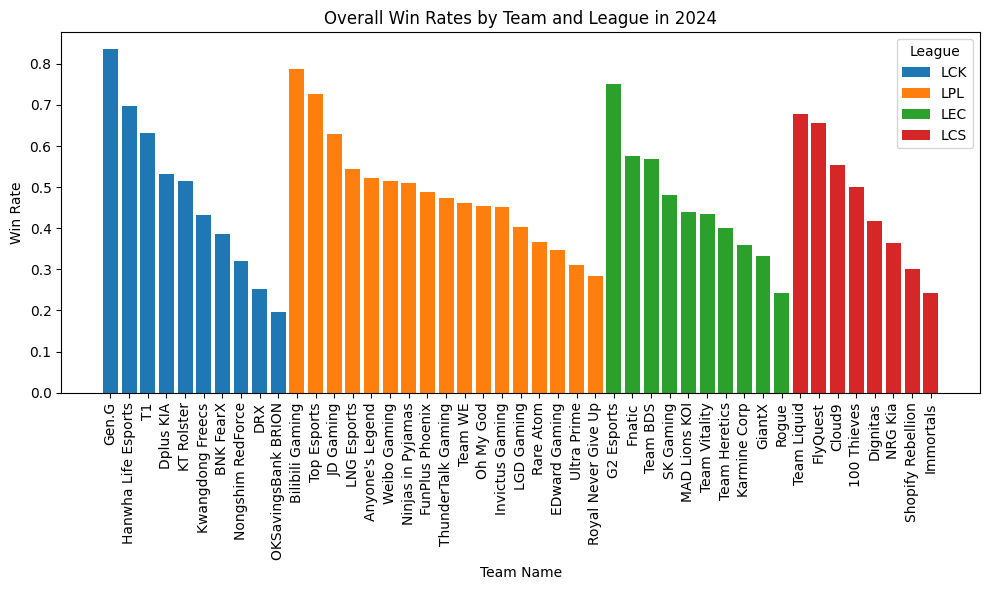

In [6]:
import matplotlib.pyplot as plt

major_leagues = ['LCS', 'LEC', 'LCK', 'LPL']
major_region_stats = team_stats[team_stats['league'].isin(major_leagues)]

plt.figure(figsize=(10, 6))
for league in major_region_stats['league'].unique():
    league_teams = team_stats[team_stats['league'] == league]
    plt.bar(league_teams['teamname'], league_teams['winrate'], label=league)

plt.xlabel('Team Name')
plt.ylabel('Win Rate')
plt.title('Overall Win Rates by Team and League in 2024')
plt.xticks(rotation=90)
plt.legend(title='League')
plt.tight_layout()
plt.show()

In [7]:
player_games = df[['teamname', 'gameid', 'league', 'patch', 'side', 'result', 'playername', 'champion', 'position', 'kills', 'deaths', 'assists', 'dpm']]

player_games.head()

,teamname,gameid,league,patch,side,result,playername,champion,position,kills,deaths,assists,dpm
0,LNG Esports,10660-10660_game_1,DCup,13.24,Blue,0,Zika,Aatrox,top,1,3,1,225.6204
1,LNG Esports,10660-10660_game_1,DCup,13.24,Blue,0,Weiwei,Maokai,jng,0,4,3,234.1782
2,LNG Esports,10660-10660_game_1,DCup,13.24,Blue,0,Scout,Orianna,mid,0,2,0,318.2927
3,LNG Esports,10660-10660_game_1,DCup,13.24,Blue,0,GALA,Kalista,bot,2,4,0,346.5111
4,LNG Esports,10660-10660_game_1,DCup,13.24,Blue,0,Mark,Senna,sup,0,3,3,205.2280


In [8]:
player_overall_stats = player_games.groupby(['playername', 'champion']).agg(
    totalgames=('gameid', 'nunique'),
    totalwins=('result', 'sum'),
    totalkills=('kills', 'sum'),
    totaldeaths=('deaths', 'sum'),
    totalassists=('assists', 'sum')
).reset_index()

player_overall_stats['winrate'] = player_overall_stats['totalwins'] / player_overall_stats['totalgames']
player_overall_stats['totaldeaths'] = player_overall_stats['totaldeaths'].replace(0, 1)

player_overall_stats['kda'] = (player_overall_stats['totalkills'] + player_overall_stats['totalassists']) / player_overall_stats['totaldeaths']
player_info = player_games[['playername', 'league', 'champion', 'position']].drop_duplicates()
player_overall_stats = player_overall_stats.merge(player_info, on=['playername', 'champion'], how='left')

player_overall_stats = player_overall_stats.sort_values(by='winrate', ascending=False)

player_overall_stats.head()

,playername,champion,totalgames,totalwins,totalkills,totaldeaths,totalassists,winrate,kda,league,position
2,0din,Aurelion Sol,1,1,4,4,10,1.0,3.500000,UL,mid
7296,DrCalculus,Shen,1,1,5,1,15,1.0,20.000000,NACL,top
7297,DrCalculus,Twisted Fate,2,2,10,3,16,1.0,8.666667,NACL,top
7300,DrChaos,Braum,1,1,1,2,17,1.0,9.000000,NLC,sup
7301,DrChaos,Galio,1,1,2,3,16,1.0,6.000000,NLC,sup


In [9]:
lck_players = player_overall_stats[player_overall_stats['league'] == 'LCK']

print(lck_players.head(10))  

      playername      champion  totalgames  totalwins  totalkills  \
7472        DuDu       Camille           1          1           2   
7547        Duro        Maokai           1          1           0   
7553        Duro          Ornn           1          1           1   
7155       Doran  Twisted Fate           4          4          18   
7156       Doran          Udyr           4          4          11   
7157       Doran      Vladimir           1          1           2   
33003       Zeus         Sylas           1          1           3   
32969       Zeus        Aurora           1          1           2   
32995       Zeus         Poppy           1          1           4   
32842       Zeka         Jayce           1          1           4   

       totaldeaths  totalassists  winrate        kda league position  
7472             5             7      1.0   1.800000    LCK      top  
7547             3             7      1.0   2.333333    LCK      sup  
7553             1         

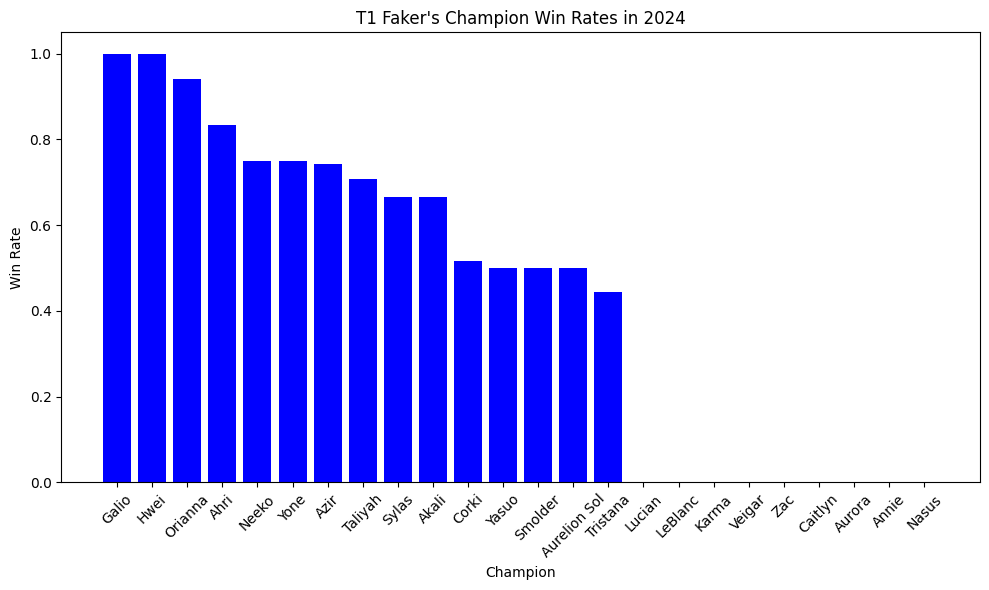

In [10]:
faker_stats = player_overall_stats[player_overall_stats['playername'] == 'Faker']

plt.figure(figsize=(10, 6))
plt.bar(faker_stats['champion'], faker_stats['winrate'], color='Blue')

plt.xlabel('Champion')
plt.ylabel('Win Rate')
plt.title("T1 Faker's Champion Win Rates in 2024")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

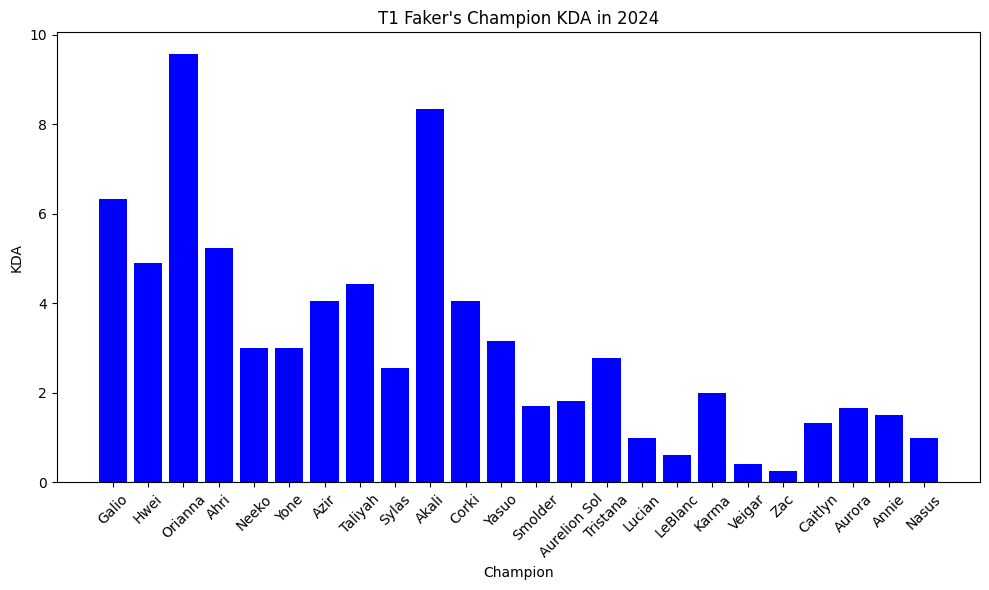

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(faker_stats['champion'], faker_stats['kda'], color='Blue')

plt.xlabel('Champion')
plt.ylabel('KDA')
plt.title("T1 Faker's Champion KDA in 2024")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

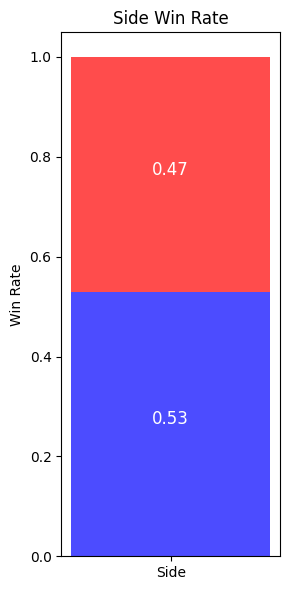

In [12]:
side_win_percentage = team_games.groupby('side').agg(
    totalgames=('gameid', 'count'),
    totalwins=('result', 'sum')
).reset_index()

side_win_percentage['win_percentage'] = side_win_percentage['totalwins'] / side_win_percentage['totalgames']

blue_percentage = side_win_percentage[side_win_percentage['side'] == 'Blue']['win_percentage'].values[0]
red_percentage = side_win_percentage[side_win_percentage['side'] == 'Red']['win_percentage'].values[0]

plt.figure(figsize=(3, 6))

plt.bar('Side', blue_percentage, color='blue', label='Blue Side', alpha=0.7, width=1)
plt.bar('Side', red_percentage, color='red', label='Red Side', bottom=blue_percentage, alpha=0.7, width=1)

plt.text('Side', blue_percentage / 2, f'{blue_percentage:.2f}', ha='center', color='white', fontsize=12)
plt.text('Side', blue_percentage + red_percentage / 2, f'{red_percentage:.2f}', ha='center', color='white', fontsize=12)

plt.ylabel('Win Rate')
plt.title('Side Win Rate')

plt.tight_layout()
plt.show()


## Generating Train/Test Features

In [13]:
dfs = []

player_games = df[['gameid', 'side', 'playername', 'champion', 'position', 'kills', 'deaths', 'assists']]

for side in ['Blue', 'Red']:
    for pos in ['top', 'jng', 'mid', 'bot', 'sup']:
        side_pos_data = player_games[(player_games['side'] == side) & (player_games['position'] == pos)].copy()

        side_pos_data = side_pos_data.rename(columns={
            'playername': f'{side.lower()}{pos}name',
            'champion': f'{side.lower()}{pos}champion',
            'kills': f'{side.lower()}{pos}kills',
            'assists': f'{side.lower()}{pos}assists',
            'deaths': f'{side.lower()}{pos}deaths',
        })

        side_pos_data = side_pos_data.drop(columns=['side', 'position'])

        
        dfs.append(side_pos_data)

player_info = dfs[0]

for d in dfs[1:]:
    player_info = pd.merge(player_info, d, on='gameid', how='left')

player_info.head()

,gameid,bluetopname,bluetopchampion,bluetopkills,bluetopdeaths,bluetopassists,bluejngname,bluejngchampion,bluejngkills,bluejngdeaths,...,redbotname,redbotchampion,redbotkills,redbotdeaths,redbotassists,redsupname,redsupchampion,redsupkills,redsupdeaths,redsupassists
0,10660-10660_game_1,Zika,Aatrox,1,3,1,Weiwei,Maokai,0,4,...,Assum,Varus,7,1,5,Zorah,Renata Glasc,0,2,13
1,10660-10660_game_2,Zika,Kennen,2,3,0,Weiwei,Bel'Veth,0,5,...,Assum,Kalista,4,0,5,Zorah,Rell,1,1,11
2,10660-10660_game_3,Zika,Jax,2,0,5,Weiwei,Bel'Veth,6,1,...,Assum,Kalista,1,5,0,Zorah,Renata Glasc,0,3,2
3,10660-10660_game_4,Xiaoxu,Rumble,5,1,7,naiyou,Jarvan IV,2,2,...,GALA,Kalista,0,4,6,Hang,Senna,3,3,4
4,10661-10661_game_1,sheer,Renekton,2,1,6,Maggie,Xin Zhao,4,5,...,JackeyLove,Lucian,2,5,10,Meiko,Milio,3,4,12


In [14]:
import pandas as pd

red_team_info = team_games[team_games['side'] == 'Red'].rename(
    columns={'teamname': 'redteamname', 'result': 'redresult'}
)[['gameid', 'redteamname', 'redresult']]

blue_team_info = team_games[team_games['side'] == 'Blue'].rename(
    columns={'teamname': 'blueteamname', 'result': 'blueresult'}
)[['gameid', 'blueteamname', 'blueresult', 'league']]

game_info = pd.merge(red_team_info, blue_team_info, on='gameid', how='left')
game_info = game_info.drop_duplicates('gameid')
game_info['result'] = game_info['blueresult'].apply(lambda x: 1 if x == 1 else 0)
game_info = game_info.drop(columns=['redresult', 'blueresult'])

game_info.head()


,gameid,redteamname,blueteamname,league,result
0,10660-10660_game_1,Rare Atom,LNG Esports,DCup,0
1,10660-10660_game_2,Rare Atom,LNG Esports,DCup,0
2,10660-10660_game_3,Rare Atom,LNG Esports,DCup,1
3,10660-10660_game_4,LNG Esports,Rare Atom,DCup,1
4,10661-10661_game_1,Top Esports,JD Gaming,DCup,1


In [15]:
game_info = game_info.merge(player_info, on="gameid")

In [16]:
game_info.head()

,gameid,redteamname,blueteamname,league,result,bluetopname,bluetopchampion,bluetopkills,bluetopdeaths,bluetopassists,...,redbotname,redbotchampion,redbotkills,redbotdeaths,redbotassists,redsupname,redsupchampion,redsupkills,redsupdeaths,redsupassists
0,10660-10660_game_1,Rare Atom,LNG Esports,DCup,0,Zika,Aatrox,1,3,1,...,Assum,Varus,7,1,5,Zorah,Renata Glasc,0,2,13
1,10660-10660_game_2,Rare Atom,LNG Esports,DCup,0,Zika,Kennen,2,3,0,...,Assum,Kalista,4,0,5,Zorah,Rell,1,1,11
2,10660-10660_game_3,Rare Atom,LNG Esports,DCup,1,Zika,Jax,2,0,5,...,Assum,Kalista,1,5,0,Zorah,Renata Glasc,0,3,2
3,10660-10660_game_4,LNG Esports,Rare Atom,DCup,1,Xiaoxu,Rumble,5,1,7,...,GALA,Kalista,0,4,6,Hang,Senna,3,3,4
4,10661-10661_game_1,Top Esports,JD Gaming,DCup,1,sheer,Renekton,2,1,6,...,JackeyLove,Lucian,2,5,10,Meiko,Milio,3,4,12


In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(game_info, test_size=0.2, random_state=2)

In [18]:
league_team_results = train.groupby(['league', 'redteamname']).agg(
    red_wins=('result', lambda x: (x == 0).sum()),
    red_games=('result', 'size')
).reset_index()

league_team_results['redwinrate'] = league_team_results['red_wins'] / league_team_results['red_games']

league_team_results = league_team_results.rename(columns={'redteamname': 'teamname'})

league_team_results_blue = train.groupby(['league', 'blueteamname']).agg(
    blue_wins=('result', lambda x: (x == 1).sum()),
    blue_games=('result', 'size')
).reset_index()

league_team_results_blue['bluewinrate'] = league_team_results_blue['blue_wins'] / league_team_results_blue['blue_games']

league_team_results_blue = league_team_results_blue.rename(columns={'blueteamname': 'teamname'})

team_winrate = pd.concat([league_team_results, league_team_results_blue])

team_winrate = team_winrate.groupby(['league', 'teamname']).agg({
    'redwinrate': 'first',
    'bluewinrate': 'first'
}).reset_index()

team_winrate[team_winrate["league"] == "LCK"]

,league,teamname,redwinrate,bluewinrate
297,LCK,BNK FearX,0.393939,0.375000
298,LCK,DRX,0.214286,0.289474
299,LCK,Dplus KIA,0.465116,0.522727
300,LCK,Gen.G,0.854167,0.789474
301,LCK,Hanwha Life Esports,0.653061,0.733333
302,LCK,KT Rolster,0.406250,0.638298
303,LCK,Kwangdong Freecs,0.441860,0.566667
304,LCK,Nongshim RedForce,0.270270,0.333333
305,LCK,OKSavingsBank BRION,0.153846,0.184211
306,LCK,T1,0.630435,0.581395


In [19]:
train = train.merge(team_winrate[['teamname', 'league', 'redwinrate']], left_on=['redteamname', 'league'], right_on=['teamname', 'league'], how='left')
train = train.merge(team_winrate[['teamname', 'league', 'bluewinrate']], left_on=['blueteamname', 'league'], right_on=['teamname', 'league'], how='left')

train = train.drop(columns=['teamname_x', 'teamname_y'])

train.head()

,gameid,redteamname,blueteamname,league,result,bluetopname,bluetopchampion,bluetopkills,bluetopdeaths,bluetopassists,...,redbotkills,redbotdeaths,redbotassists,redsupname,redsupchampion,redsupkills,redsupdeaths,redsupassists,redwinrate,bluewinrate
0,LOLTMNT03_91737,Ramboot Club,Los Heretics,LVP SL,0,Carlsen,Rumble,3,5,3,...,8,3,5,Mxe,Nautilus,0,4,12,0.562500,0.724138
1,LOLTMNT03_87990,Liberty Academy,RED Academy,CBLOLA,0,zynts,K'Sante,1,6,2,...,10,1,7,Momochi,Nautilus,3,4,13,0.312500,0.533333
2,LOLTMNT06_31126,A One Man Army,BeFive,EM,0,Falleo,K'Sante,1,1,5,...,5,0,8,B Butcher,Rakan,0,2,10,0.500000,0.000000
3,LOLTMNT03_112445,Ground Zero Gaming,Antic Esports,LCO,0,zorenous,Gragas,0,1,3,...,9,1,5,Kurak,Leona,0,2,11,0.666667,0.571429
4,11351-11351_game_3,Ninjas in Pyjamas,LGD Gaming,LPL,1,Burdol,Renekton,5,3,5,...,2,2,1,Zhuo,Leona,2,3,2,0.468085,0.382353


In [20]:
test = test.merge(team_winrate[['teamname', 'league', 'redwinrate']], left_on=['redteamname', 'league'], right_on=['teamname', 'league'], how='left')
test = test.merge(team_winrate[['teamname', 'league', 'bluewinrate']], left_on=['blueteamname', 'league'], right_on=['teamname', 'league'], how='left')

test = test.drop(columns=['teamname_x', 'teamname_y'])

test.head()

,gameid,redteamname,blueteamname,league,result,bluetopname,bluetopchampion,bluetopkills,bluetopdeaths,bluetopassists,...,redbotkills,redbotdeaths,redbotassists,redsupname,redsupchampion,redsupkills,redsupdeaths,redsupassists,redwinrate,bluewinrate
0,LOLTMNT01_130850,GnG Amazigh,RA'AD,AL,0,Maged,Gragas,2,5,3,...,13,1,3,B Butcher,Leona,1,7,15,0.384615,0.000000
1,10873-10873_game_1,Rare Atom Period,Team WE Academy,LDL,1,705,Aatrox,3,0,6,...,3,5,8,Today,Ezreal,4,3,8,0.187500,0.470588
2,LOLTMNT03_52702,Team Legion,Team Phantasma,GLL,1,KLOWNY,Gragas,4,2,6,...,5,4,3,Kamyta,Rell,0,7,7,0.000000,0.666667
3,11283-11283_game_1,Invictus Gaming,Rare Atom,LPL,1,Xiaoxu,K'Sante,5,3,7,...,0,4,5,Vampire,Maokai,0,5,4,0.545455,0.321429
4,LOLTMNT01_54352,Kanga Esports,MAMMOTH,LCO,1,Nectaar,Gnar,4,3,12,...,1,4,2,Kurak,Senna,4,2,7,0.133333,0.222222


In [21]:
for side in ['blue', 'red']:
    for pos in ['top', 'jng', 'mid', 'bot', 'sup']:
        player_overall_stats = train.groupby([f'{side}{pos}name', f'{side}{pos}champion']).agg(
            totalgames=('gameid', 'nunique'),
            totalwins=('result', 'sum'),
            totalkills=(f'{side}{pos}kills', 'sum'),
            totaldeaths=(f'{side}{pos}deaths', 'sum'),
            totalassists=(f'{side}{pos}assists', 'sum')
        ).reset_index()

        player_overall_stats[f'{side}{pos}winrate'] = player_overall_stats['totalwins'] / player_overall_stats['totalgames']
        player_overall_stats[f'totaldeaths'] = player_overall_stats['totaldeaths'].replace(0, 1)

        player_overall_stats[f'{side}{pos}kda'] = (player_overall_stats['totalkills'] + player_overall_stats['totalassists']) / player_overall_stats['totaldeaths']
        player_overall_stats = player_overall_stats.drop(columns=["totalwins", "totalkills", "totaldeaths", "totalassists"])
        player_overall_stats = player_overall_stats.rename(columns={'totalgames': f'{side}{pos}games'})

        train = train.merge(player_overall_stats, on=[f"{side}{pos}name", f'{side}{pos}champion'])
        train = train.drop(columns=[f'{side}{pos}kills', f'{side}{pos}deaths', f'{side}{pos}assists'])

        test = test.merge(player_overall_stats, on=[f"{side}{pos}name", f'{side}{pos}champion'])
        test = test.drop(columns=[f'{side}{pos}kills', f'{side}{pos}deaths', f'{side}{pos}assists'])


In [22]:
train.head()

,gameid,redteamname,blueteamname,league,result,bluetopname,bluetopchampion,bluejngname,bluejngchampion,bluemidname,...,redjngkda,redmidgames,redmidwinrate,redmidkda,redbotgames,redbotwinrate,redbotkda,redsupgames,redsupwinrate,redsupkda
0,LOLTMNT03_91737,Ramboot Club,Los Heretics,LVP SL,0,Carlsen,Rumble,Xerxe,Maokai,Sertuss,...,3.526316,4,0.5,4.70,1,0.0,4.333333,3,0.000000,6.000000
1,LOLTMNT03_87990,Liberty Academy,RED Academy,CBLOLA,0,zynts,K'Sante,doom,Nidalee,Peco,...,4.647059,2,0.0,4.60,2,0.0,4.800000,6,0.666667,1.407407
2,LOLTMNT06_31126,A One Man Army,BeFive,EM,0,Falleo,K'Sante,DoubleAiM,Jax,tibor,...,3.000000,4,0.5,3.25,1,0.0,13.000000,3,0.000000,12.250000
3,LOLTMNT03_112445,Ground Zero Gaming,Antic Esports,LCO,0,zorenous,Gragas,Foreigner,Zyra,Raes,...,3.166667,1,0.0,2.00,1,0.0,14.000000,2,0.500000,1.666667
4,11351-11351_game_3,Ninjas in Pyjamas,LGD Gaming,LPL,1,Burdol,Renekton,Meteor,Brand,haichao,...,3.722222,2,0.5,4.50,6,0.5,3.769231,7,0.428571,2.400000


In [23]:
train_encoded = pd.get_dummies(train, columns=[
    'redteamname', 
    'blueteamname', 
    'league', 
    'bluetopchampion', 
    'bluetopname', 
    'bluejngchampion', 
    'bluejngname', 
    'bluemidchampion', 
    'bluemidname', 
    'bluebotchampion', 
    'bluebotname', 
    'bluesupchampion', 
    'bluesupname', 
    'redtopchampion', 
    'redtopname', 
    'redjngchampion', 
    'redjngname', 
    'redmidchampion', 
    'redmidname', 
    'redbotchampion', 
    'redbotname', 
    'redsupchampion', 
    'redsupname'
])

test_encoded = pd.get_dummies(test, columns=[
    'redteamname', 
    'blueteamname', 
    'league', 
    'bluetopchampion', 
    'bluetopname', 
    'bluejngchampion', 
    'bluejngname', 
    'bluemidchampion', 
    'bluemidname', 
    'bluebotchampion', 
    'bluebotname', 
    'bluesupchampion', 
    'bluesupname', 
    'redtopchampion', 
    'redtopname', 
    'redjngchampion', 
    'redjngname', 
    'redmidchampion', 
    'redmidname', 
    'redbotchampion', 
    'redbotname', 
    'redsupchampion', 
    'redsupname'
])

test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

In [24]:
train_stats = train.drop(columns=[
    'redteamname', 
    'blueteamname', 
    'league', 
    'bluetopchampion', 
    'bluetopname', 
    'bluejngchampion', 
    'bluejngname', 
    'bluemidchampion', 
    'bluemidname', 
    'bluebotchampion', 
    'bluebotname', 
    'bluesupchampion', 
    'bluesupname', 
    'redtopchampion', 
    'redtopname', 
    'redjngchampion', 
    'redjngname', 
    'redmidchampion', 
    'redmidname', 
    'redbotchampion', 
    'redbotname', 
    'redsupchampion', 
    'redsupname'
])

test_stats = test.drop(columns=[
    'redteamname', 
    'blueteamname', 
    'league', 
    'bluetopchampion', 
    'bluetopname', 
    'bluejngchampion', 
    'bluejngname', 
    'bluemidchampion', 
    'bluemidname', 
    'bluebotchampion', 
    'bluebotname', 
    'bluesupchampion', 
    'bluesupname', 
    'redtopchampion', 
    'redtopname', 
    'redjngchampion', 
    'redjngname', 
    'redmidchampion', 
    'redmidname', 
    'redbotchampion', 
    'redbotname', 
    'redsupchampion', 
    'redsupname'
])

In [25]:
stat_cols = []
for side in ['red', 'blue']:
    for role in  ['top', 'jng', 'mid', 'bot', 'sup']:
        for stat in ['winrate', 'kda', 'games']:
            stat_cols.append(f"{side}{role}{stat}")

stat_cols.extend(['bluewinrate', 'redwinrate'])

In [26]:
def feat_all(df):
    rows_to_drop = df.drop(['gameid', 'result'], axis=1).isna().any(axis=1)
    train_df = df[~rows_to_drop].drop(['gameid', 'result'], axis=1)
    test_df = df[~rows_to_drop]['result']
    return train_df, test_df 

def feat_ohe(df):
    rows_to_drop = df.drop(columns=stat_cols + ['gameid', 'result']).isna().any(axis=1)
    train_df = df[~rows_to_drop].drop(stat_cols + ['gameid', 'result'], axis=1)
    test_df = df[~rows_to_drop]['result']
    return train_df, test_df 

In [27]:
datasets = {}

In [28]:
Xtrain, ytrain = feat_all(train_encoded)
Xtest, ytest = feat_all(test_encoded)

datasets['All Features'] = [Xtrain, ytrain, Xtest, ytest]

In [29]:
Xtrain, ytrain = feat_all(train_stats)
Xtest, ytest = feat_all(test_stats)

datasets['Statistical Features'] = [Xtrain, ytrain, Xtest, ytest]

In [30]:
Xtrain, ytrain = feat_ohe(train_encoded)
Xtest, ytest = feat_ohe(test_encoded)


datasets['One Hot Encodings'] = [Xtrain, ytrain, Xtest, ytest]

## Model Testing and Evaluation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression,
    "Random Forest": RandomForestClassifier,
    "Gradient Boosted Trees": GradientBoostingClassifier,
}

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score

results = []
for dataset_name, (Xtrain, ytrain, Xtest, ytest) in datasets.items():
    for model_name, model in models.items():
        print(dataset_name, model_name)
        mod = model()
        mod.fit(Xtrain, ytrain)
        
        predictions = mod.predict(Xtest)
        probabilities = mod.predict_proba(Xtest)[:, 1]
        
        accuracy = accuracy_score(ytest, predictions)
        auc = roc_auc_score(ytest, probabilities)
        
        results.append({
            "Dataset Name": dataset_name,
            "Model Name": model_name,
            "Model": mod,
            "Accuracy": accuracy,
            "AUC-ROC": auc
        })

All Features Logistic Regression


c:\Users\Andrew Yin\Projects\School\CSE 158\Assignment 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


All Features Random Forest
All Features Gradient Boosted Trees
Statistical Features Logistic Regression
Statistical Features Random Forest


c:\Users\Andrew Yin\Projects\School\CSE 158\Assignment 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Statistical Features Gradient Boosted Trees
One Hot Encodings Logistic Regression
One Hot Encodings Random Forest
One Hot Encodings Gradient Boosted Trees


In [33]:
print(results[3])

{'Dataset Name': 'Statistical Features', 'Model Name': 'Logistic Regression', 'Model': LogisticRegression(), 'Accuracy': 0.5154639175257731, 'AUC-ROC': np.float64(0.5570198745881603)}


In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(res):
    model = res['Model']
    _, _, Xtest, ytest = datasets[res['Dataset Name']]
    yprob = model.predict_proba(Xtest)[:, 1]

    fpr, tpr, thresholds = roc_curve(ytest, yprob)

    auc_score = res['AUC-ROC']
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{res['Model Name']} ROC Curve ({res['Dataset Name']})")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


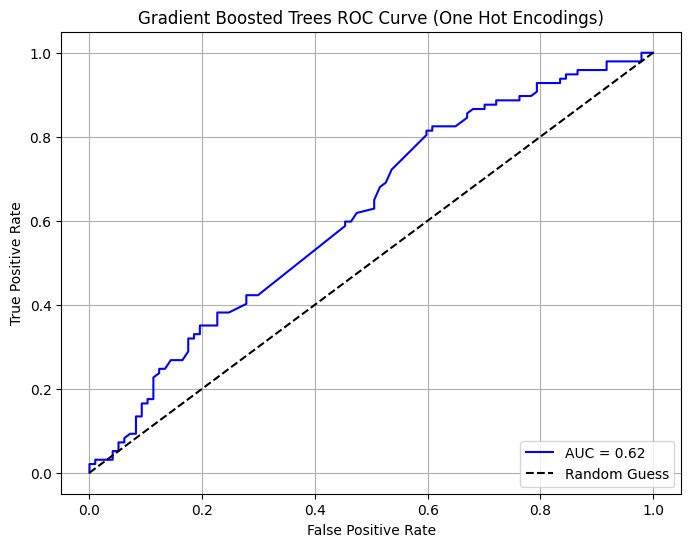

In [35]:
plot_roc_curve(results[8])

In [45]:
import numpy as np

model = results[6]['Model']
dataset_name = results[6]['Dataset Name']

X, _, _, _ = datasets[dataset_name]

coefficients = np.abs(model.coef_[0])

column_mapping = {
    col: col.split('_')[0] if '_' in col else col for col in X.columns
}

importance_by_category = {}
for col, category in column_mapping.items():
    importance_by_category[category] = importance_by_category.get(category, 0) + coefficients[X.columns.get_loc(col)]

importance_df = pd.DataFrame(list(importance_by_category.items()), columns=['Category', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)


C:\Users\Andrew Yin\AppData\Local\Temp\ipykernel_20760\2307174293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Category', data=importance_df, palette='viridis')


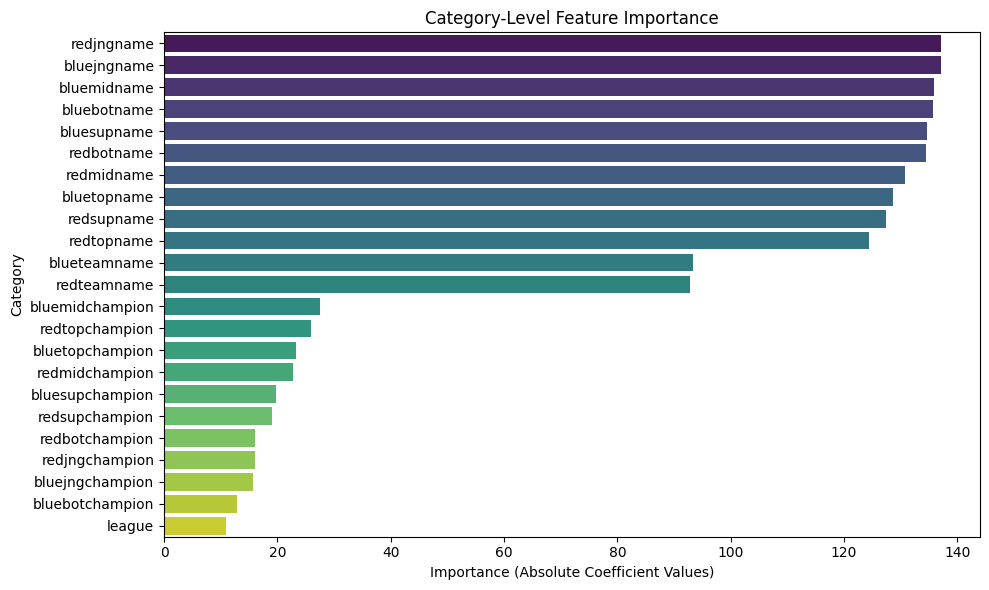

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Category', data=importance_df, palette='viridis')
plt.title('Category-Level Feature Importance')
plt.xlabel('Importance (Absolute Coefficient Values)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()
